In [1]:
include("MC.jl");

In [9]:
include("viz.jl");

In [3]:
ENV["COLUMNS"] = 200;
const N = 30;

In [4]:
fn_berlin = "irradiation_Berlin.nc";

In [5]:
data_train, data_test = getCMF(fn_berlin);

In [6]:
data_train_cls, binStarts, binMean = getBins(data_train, N)
data_test_cls = classify(data_test, binStarts);

In [7]:
ticks = rd.(binMean, 2)
xti = (binMean[[1:2:26; 30]], ticks[[1:2:26; 30]]);

### neighbor cells

In [8]:
fn_berlin_w  = "irradiation_Berlin_W.nc";

In [34]:
fn_berlin_sw = "irradiation_Berlin_SW.nc"
fn_berlin_s  = "irradiation_Berlin_S.nc"
fn_berlin_se = "irradiation_Berlin_SE.nc"
fn_berlin_e  = "irradiation_Berlin_E.nc"
fn_berlin_ne = "irradiation_Berlin_NE.nc"
fn_berlin_n  = "irradiation_Berlin_N.nc"
fn_berlin_nw = "irradiation_Berlin_NW.nc";

In [11]:
function getCMFraw(fn)
    fn_ = joinpath("data", fn)    
    ghi = getNCvar(fn_, "GHI")
    ghiCS = getNCvar(fn_, "CLEAR_SKY_GHI");
    cmf = ghi ./ ghiCS
    return cmf
end

getCMFraw (generic function with 1 method)

In [12]:
cmf_c = getCMFraw(fn_berlin)

558048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [13]:
cmf_w = getCMFraw(fn_berlin_w);

In [37]:
cmf_n, cmf_e, cmf_s, cmf_sw, cmf_se, cmf_ne, cmf_nw = 
getCMFraw.([fn_berlin_n, fn_berlin_e, fn_berlin_s, 
            fn_berlin_sw, fn_berlin_se,
            fn_berlin_ne, fn_berlin_nw]);

7-element Vector{Vector{Float64}}:
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]

## Corr with neighbor

In [31]:
function cor_neib(cmf_c, cmf_neib)
    df = DataFrame(:c => cmf_c[2:end], :neib => cmf_neib[1:end-1])
#     filter!([:c, :neib] => (c, n) -> (c, n) .< 0.95, df) # excluding clear-sky days
    filter!([:c, :neib] => (c, n) -> c.<0.95 && n.<0.95, df) # excluding clear-sky days
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [32]:
cor_w = cor_neib(cmf_c, cmf_w)

0.70651485445816

In [39]:
cor_n = cor_neib(cmf_c, cmf_n)
cor_e = cor_neib(cmf_c, cmf_e)
cor_s = cor_neib(cmf_c, cmf_s)

cor_sw = cor_neib(cmf_c, cmf_sw)
cor_se = cor_neib(cmf_c, cmf_se)
cor_ne = cor_neib(cmf_c, cmf_ne)
cor_nw = cor_neib(cmf_c, cmf_nw)

0.6918825259150507

In [40]:
cor_mat = reshape([
    cor_sw, cor_s, cor_se,    
    cor_w,     1,  cor_e,
    cor_nw, cor_n, cor_ne
], 3, 3);

corMat = rd.(cor_mat, 3);

In [42]:
pyplot();

Plots.PyPlotBackend()

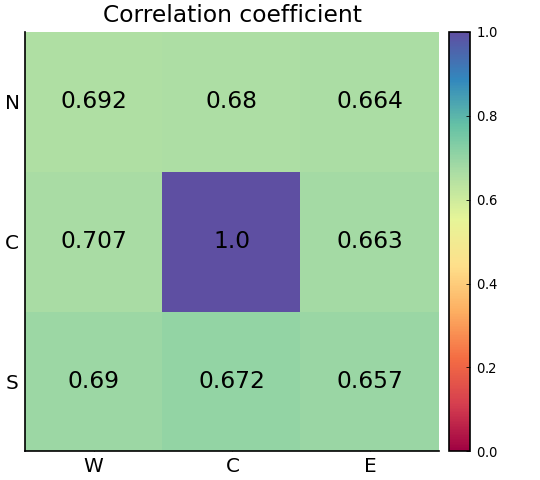

In [43]:
hm = heatmap(1:3, 1:3, cor_mat, c=palette(:Spectral_10), clim=(0,1), dpi=120, size=(450,400), title="Correlation coefficient",
    xticks=(1:3, ["W", "C", "E"]), yticks=(1:3, ["S", "C", "N"]), tickfontsize=12);
for i=1:3, j=1:3
    annotate!(i,j, corMat[i, j])
end
hm 